# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Instalar librerías necesarias

```
!pip install --upgrade pip
```
```
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info
```

## Importar librerías

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de los gráficos

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete `palmerpenguins`

#### Datos crudos

In [3]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


#### Datos previamente procesados

In [4]:
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Utilizando los conjuntos de datos de `seaborn`

In [5]:
sns.load_dataset("penguins")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Utilizando la interfaz de `Deepnote`

Links de importación de datos:

- [Conjunto de datos crudos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv).
- [Conjunto de datos previamente procesados](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv).

In [6]:
preprocess_penguins_df = pd.read_csv("penguins.csv")
preprocess_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [7]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [8]:
(
    preprocess_penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [9]:
preprocess_penguins_df.shape

(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [10]:
(
    preprocess_penguins_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [11]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [12]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
    .sum()
)

19

## ¿Cuál es la proporción de valores nulos por cada variable?

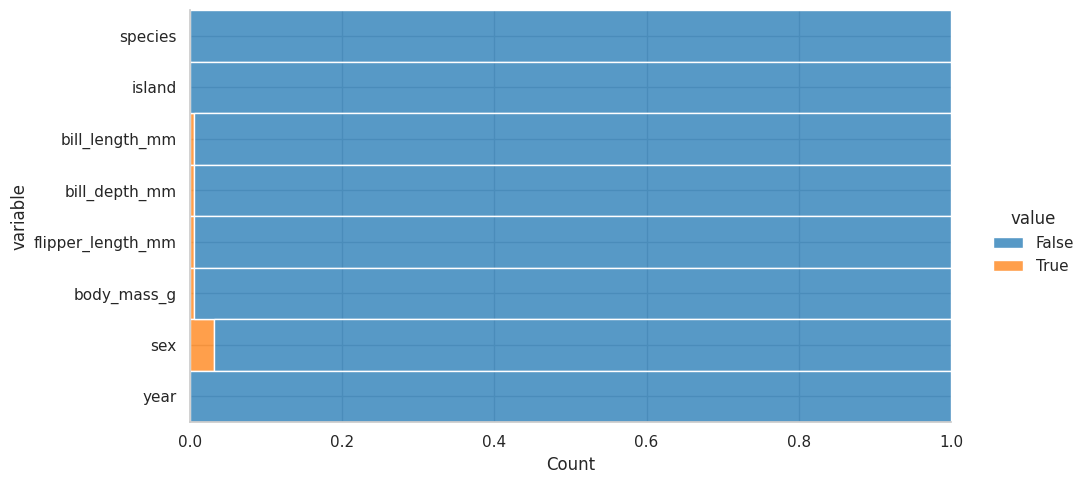

In [13]:
(
    preprocess_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y="variable",
                hue="value",
                multiple="fill",
                aspect=2
            )
        )
    )
)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<AxesSubplot: >

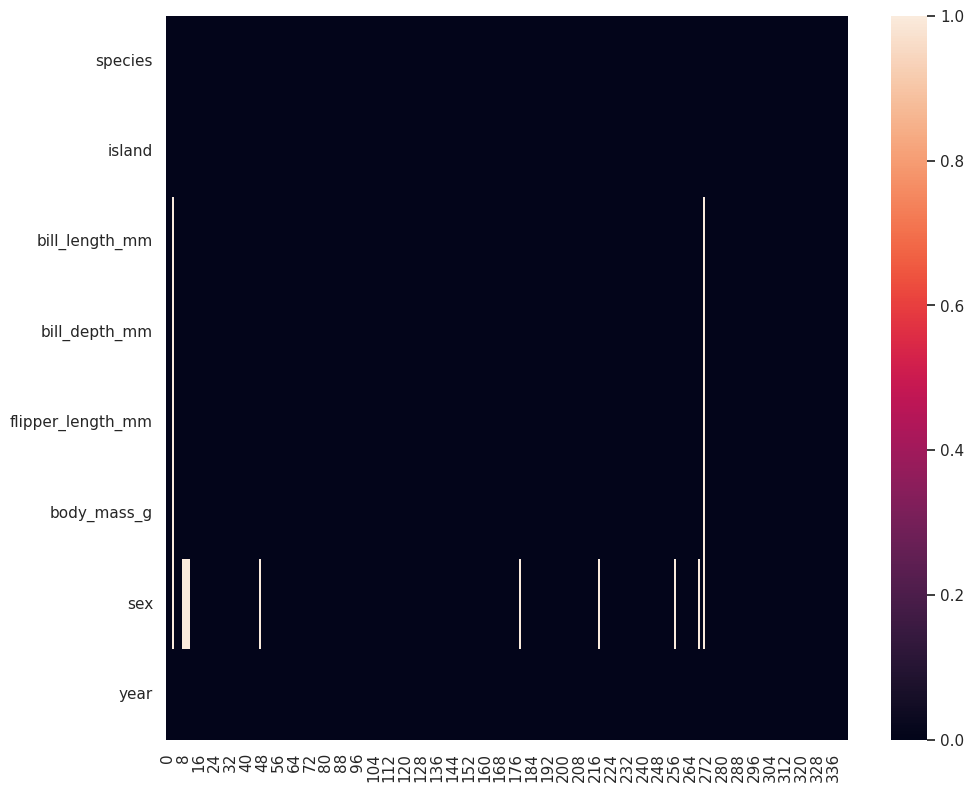

In [14]:
(
    preprocess_penguins_df
    .isnull()
    .T
    .pipe(
        lambda df : (
            sns.heatmap(
                data=df
            )
        )
    )
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [15]:
processed_penguins_df = (
    preprocess_penguins_df.dropna()
)
processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [16]:
processed_penguins_df.describe(include='all')
# all implica que tome las variables tanto numericas como categoricas
# [np.number] ó describe() toma en cuenta solo variables numericas
# object considera solo variables categoricas

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


### Solo las numéricas

In [17]:
processed_penguins_df.describe(include=[np.number])
# all implica que tome las variables tanto numericas como categoricas
# [np.number] ó describe() toma en cuenta solo variables numericas
# object considera solo variables categoricas

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Solo categóricas - 1

In [18]:
processed_penguins_df.describe(include=object)


,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Solo categóricas - 2

In [19]:
# definir variables de tipo category
(
    processed_penguins_df
    .astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    })
)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## ¿Cómo visualizar los conteos?

### Pandas

<AxesSubplot: >

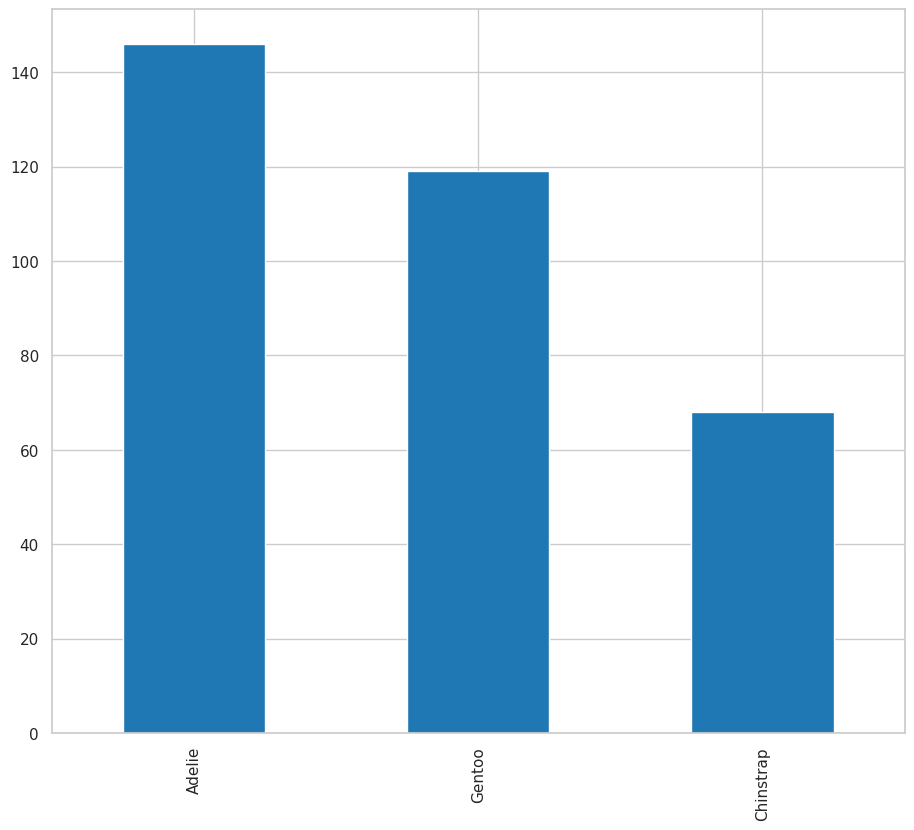

In [20]:
(
    processed_penguins_df
    .species
    .value_counts()  #cuenta el numero de cada especie
    .plot(
        kind='bar'   #grafica el conteo de cada especie
    )
)

### Seaborn

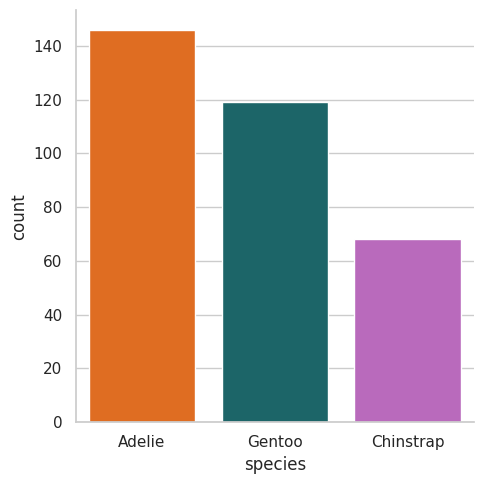

In [21]:
sns.catplot(
    data=processed_penguins_df,
    x='species',
    kind='count',
    palette=penguin_color
)

<AxesSubplot: xlabel='species', ylabel='count'>

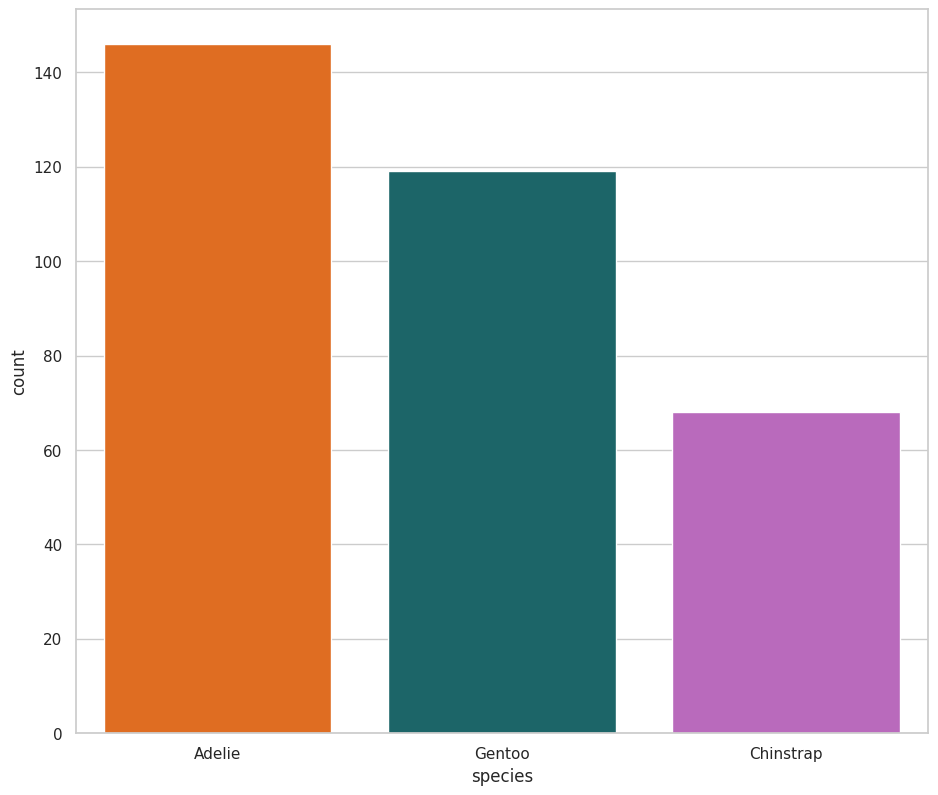

In [22]:
(
    processed_penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df: (
            sns.barplot(
                data=df,
                x='species',
                y='count',
                palette=penguin_color
            )
        )
    )
)

### ¿Cómo visualizar las proporciones?

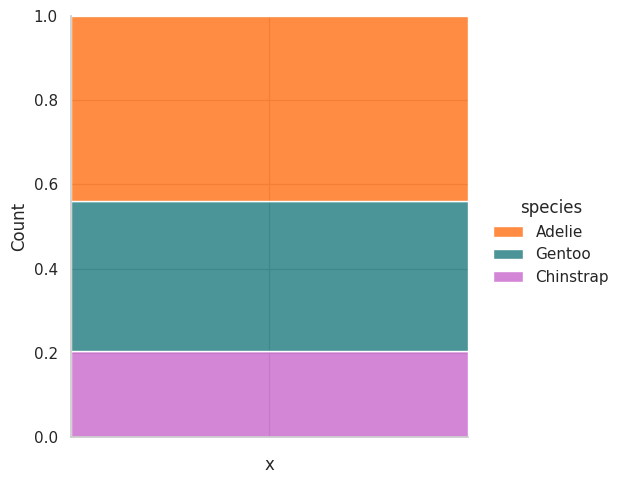

In [23]:
(
    processed_penguins_df
    .add_column('x','')  #añade columnas vacias al df
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x='x',
                hue='species',
                multiple='fill', # lo muestre en proporcion
                palette=penguin_color
            )
        )
    )
)

# Medidas de tendencia central

## Media o promedio

In [24]:
processed_penguins_df.bill_depth_mm.mean()

17.164864864864867

In [25]:
np.mean(processed_penguins_df.bill_depth_mm)

17.164864864864867

In [26]:
processed_penguins_df.mean()

/tmp/ipykernel_3038/1618060137.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana

In [27]:
processed_penguins_df.median()

/tmp/ipykernel_3038/3242987746.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.median()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

## Moda

In [28]:
processed_penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


In [29]:
processed_penguins_df.describe(include="object")

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [30]:
processed_penguins_df.max(numeric_only="True")

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor mínimo de las variables?

In [31]:
processed_penguins_df.min(numeric_only="True")

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?

In [32]:
processed_penguins_df.max(numeric_only="True") - processed_penguins_df.min(numeric_only="True")

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [33]:
processed_penguins_df.std()

/tmp/ipykernel_3038/4261057176.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.std()


bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [34]:
processed_penguins_df.std() + processed_penguins_df.mean()

/tmp/ipykernel_3038/653160575.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.std() + processed_penguins_df.mean()
/tmp/ipykernel_3038/653160575.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.std() + processed_penguins_df.mean()


bill_length_mm         49.461461
bill_depth_mm          19.134100
flipper_length_mm     214.982732
body_mass_g          5012.272859
year                 2008.854986
dtype: float64

In [35]:
processed_penguins_df.std() - processed_penguins_df.mean()

/tmp/ipykernel_3038/3630115265.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.std() - processed_penguins_df.mean()
/tmp/ipykernel_3038/3630115265.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.std() - processed_penguins_df.mean()


bill_length_mm        -38.524124
bill_depth_mm         -15.195629
flipper_length_mm    -186.951202
body_mass_g         -3401.841255
year                -2007.229098
dtype: float64

In [36]:
#sns.scatterplot(
#    x=x,
#    y=y
#)
#
#fx_1 = np.array([x.min(), x.max()])
#fy_1 =  res_x_y.intercept + res_x_y.slope *  fx_1

#plt.plot(fx_1, fy_1)

In [37]:
#sns.scatterplot(
#    x=y,
#    y=x
#)

#fx_2 = np.array([y.min(), y.max()])
#fy_2 =  res_y_x.intercept + res_y_x.slope *  fx_2

#plt.plot(fx_2, fy_2)

In [38]:
#sns.scatterplot(
#    x=x,
#    y=y
#)

#plt.plot(fx_1, fy_1)
#plt.plot(fy_2, fx_2)

## ¿Cuál es el rango intercuartílico?

In [39]:
processed_penguins_df.quantile(0.75)
#Q3

/tmp/ipykernel_3038/221191510.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(0.75)


bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [40]:
processed_penguins_df.quantile(0.75) - processed_penguins_df.quantile(0.25)

/tmp/ipykernel_3038/1337602098.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(0.75) - processed_penguins_df.quantile(0.25)


bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [41]:
(
    processed_penguins_df
    .quantile(q=[0.75,0.5,0.25])
    .transpose()
    .rename_axis("variable")
    .reset_index()
    .assign(
        iqr= lambda df: df[0.75] - df[0.25]
    )
)

/tmp/ipykernel_3038/2807587524.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df


,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

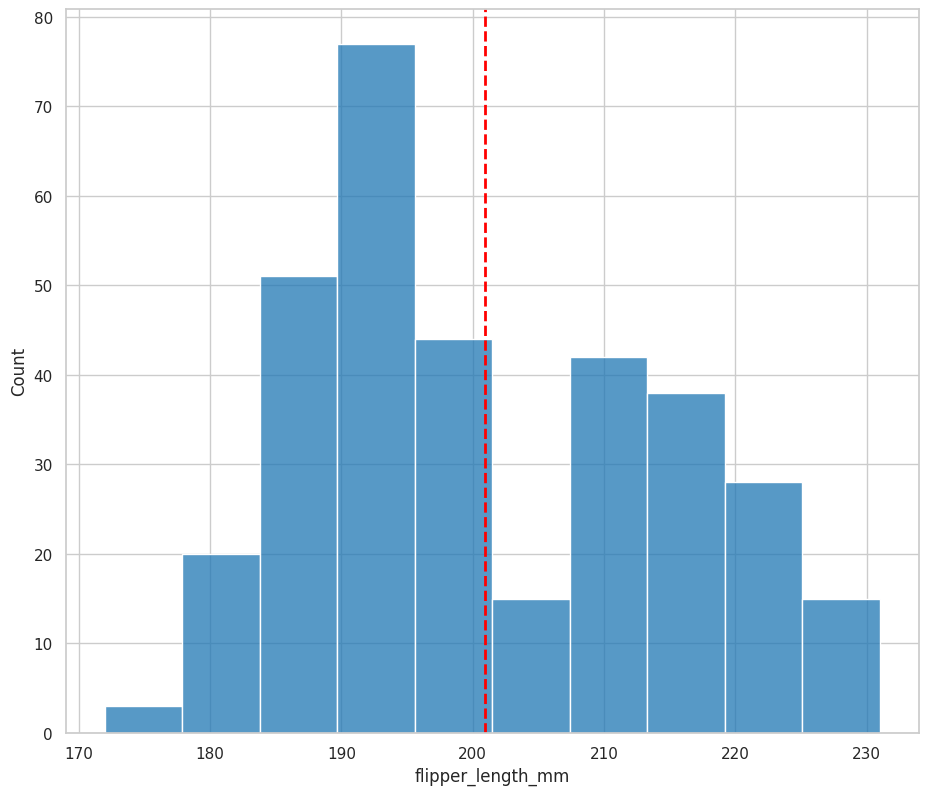

In [42]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

### Diagrama de caja / boxplot

<AxesSubplot: xlabel='flipper_length_mm'>

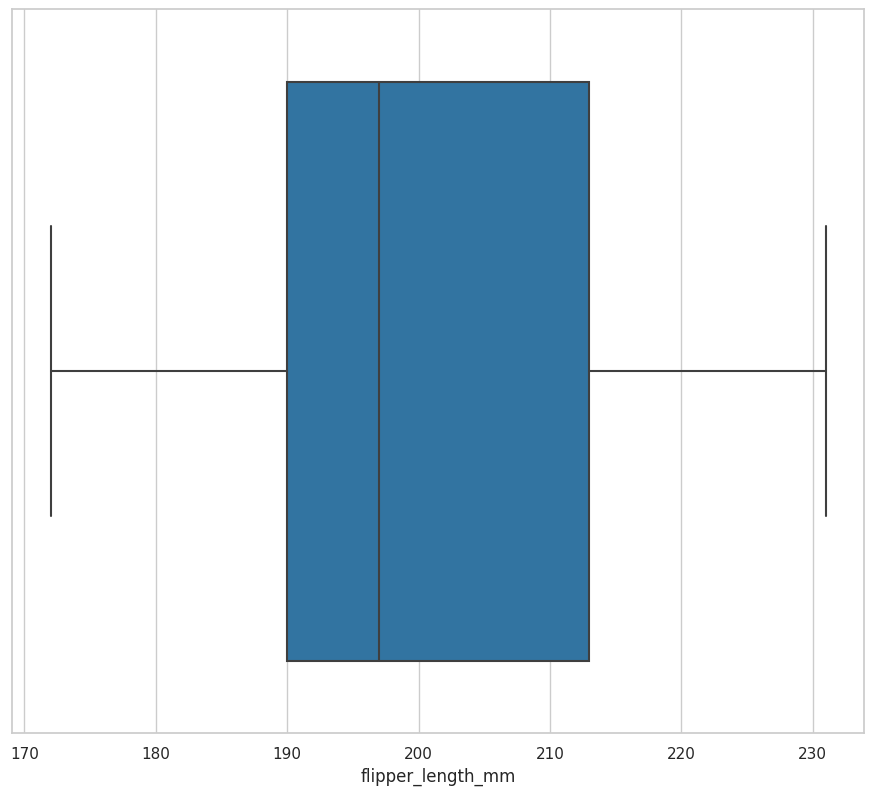

In [43]:
sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

### Limitaciones

In [44]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

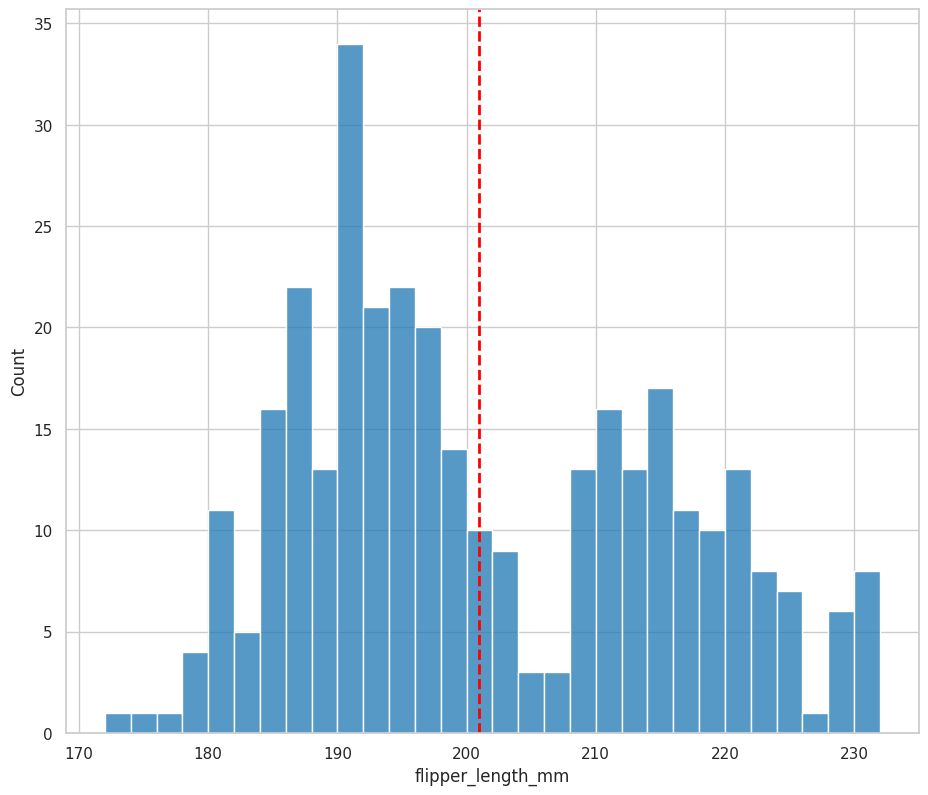

In [45]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

### Utilizando `seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

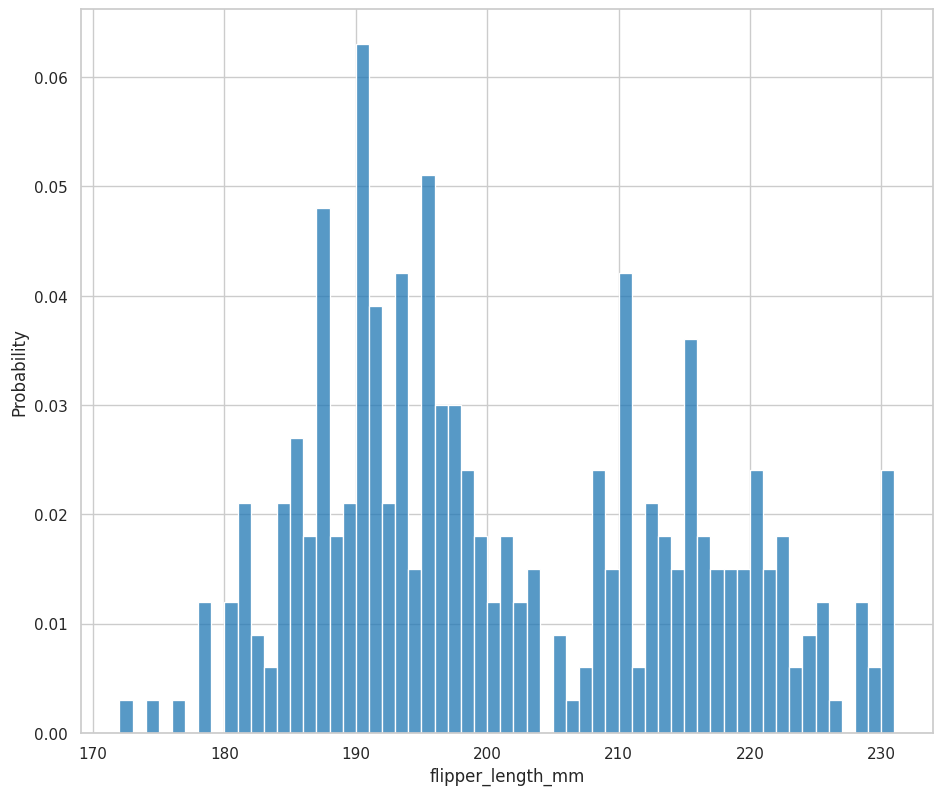

In [46]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
)

### Utilizando `empiricaldist`

In [47]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

pmf_flipper_length_mm

,probs
172.0,0.003003
174.0,0.003003
176.0,0.003003
178.0,0.012012
180.0,0.012012
181.0,0.021021
182.0,0.009009
183.0,0.006006
184.0,0.021021
185.0,0.027027


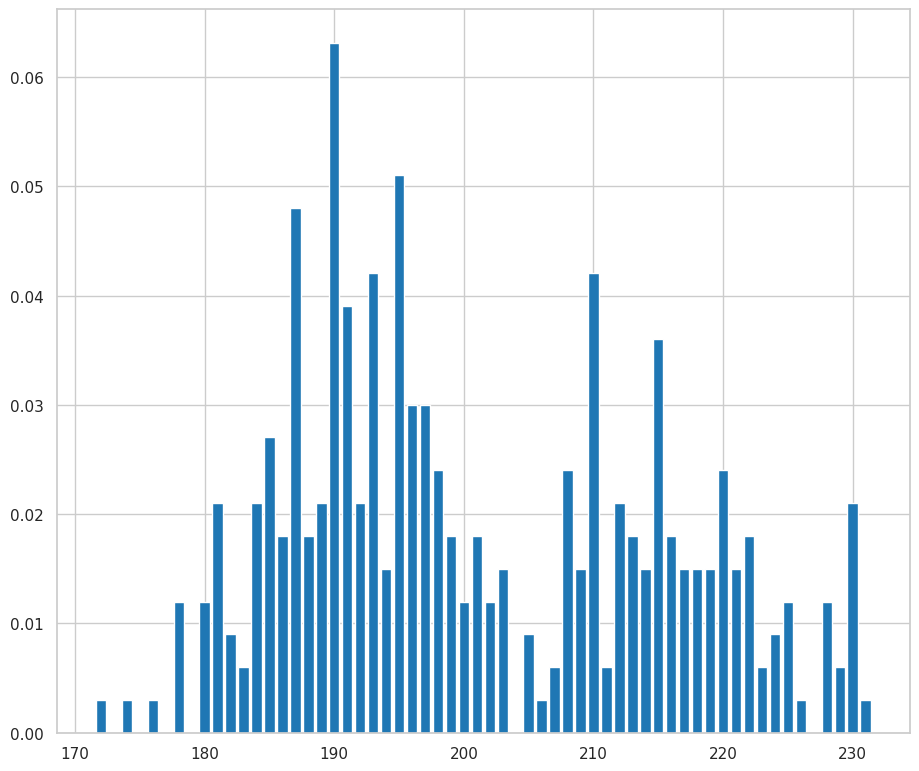

In [48]:
pmf_flipper_length_mm.bar()

In [49]:
pmf_flipper_length_mm(190)

0.06306306306306306

In [50]:
processed_penguins_df.flipper_length_mm.max()
#empiricaldist no colapso los datos como si lo hace seaborn

231.0

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando `seaborn`

sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

### Utilizando `empiricaldist`

In [51]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

200 0.5675675675675675


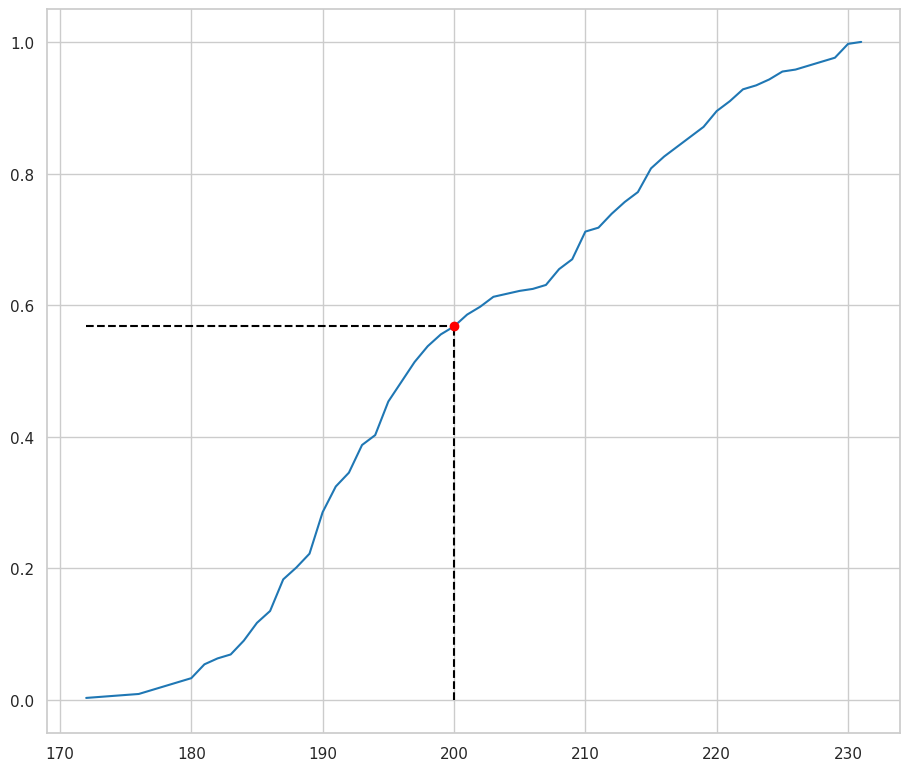

In [52]:
cdf_flipper_length_mm.plot()

q = 200
p = cdf_flipper_length_mm.forward(q)
#----------
plt.vlines (
    x = q,
    ymin = 0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=p,
   xmin=pmf_flipper_length_mm.qs[0],
   xmax=q,
   color='black',
   linestyle='dashed'
)

plt.plot(q,p,'ro')
#---------


print(q,p)

#la probabilidad de que consigamos un pinguino con la longitud q es p

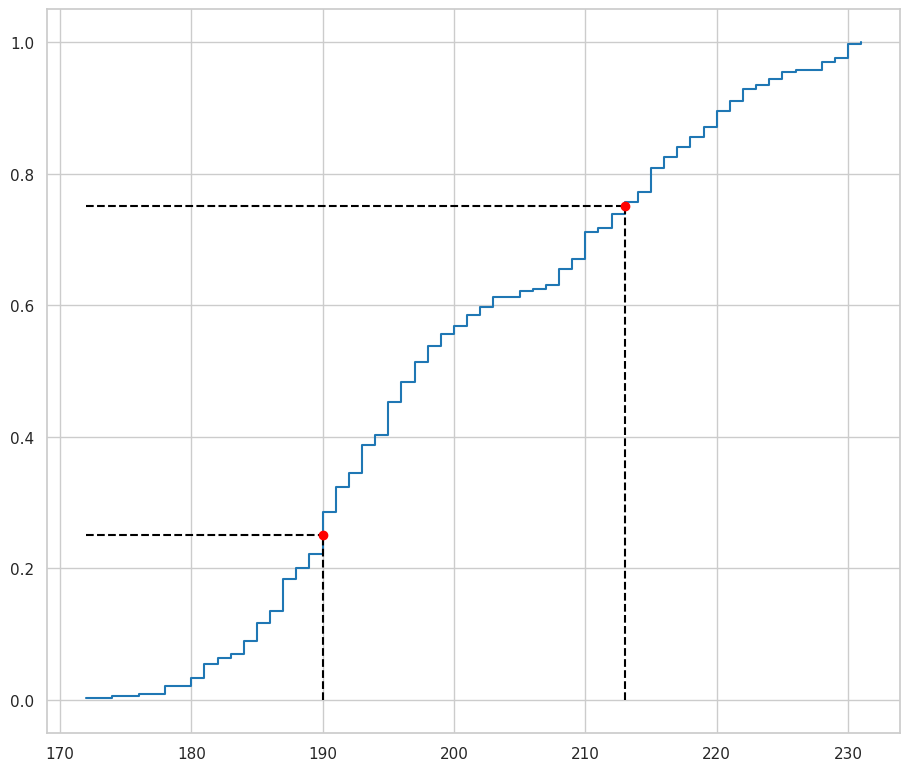

In [53]:
cdf_flipper_length_mm.step()

p_1 = 8.25 # Specify probability
P_2 = 8.75

ps = ( 0.25 , 0.75 ) # IQR
qs = cdf_flipper_length_mm.inverse(ps)

plt.vlines(
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=pmf_flipper_length_mm.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)

### Comparando distribuciones

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

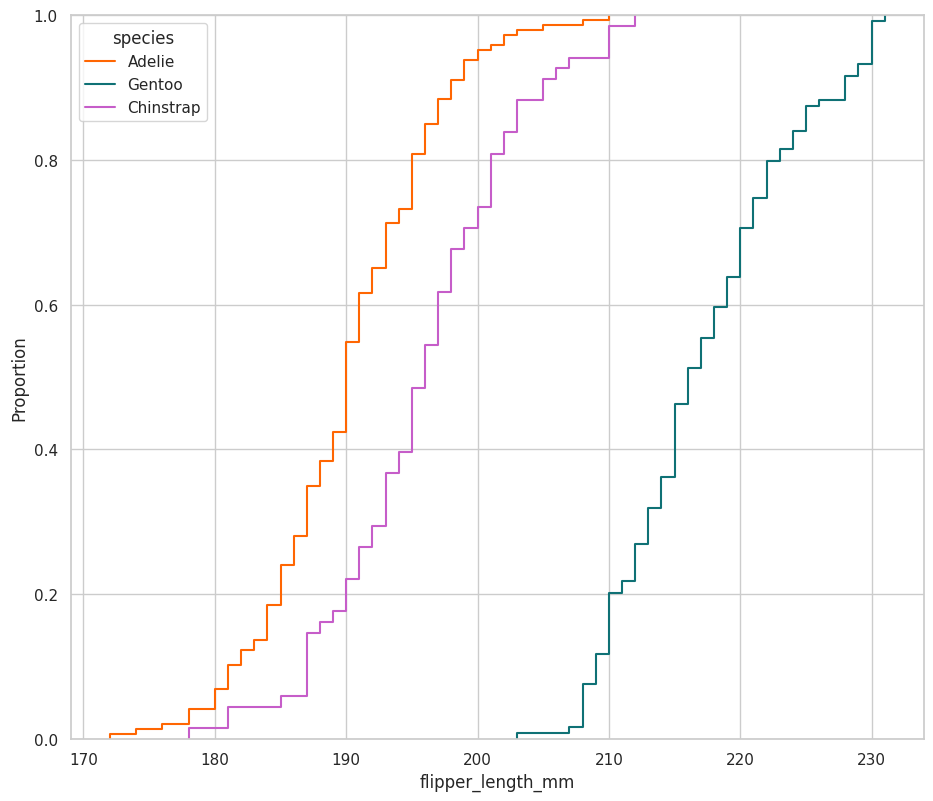

In [54]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

## Funciones de densidad de probabilidad

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

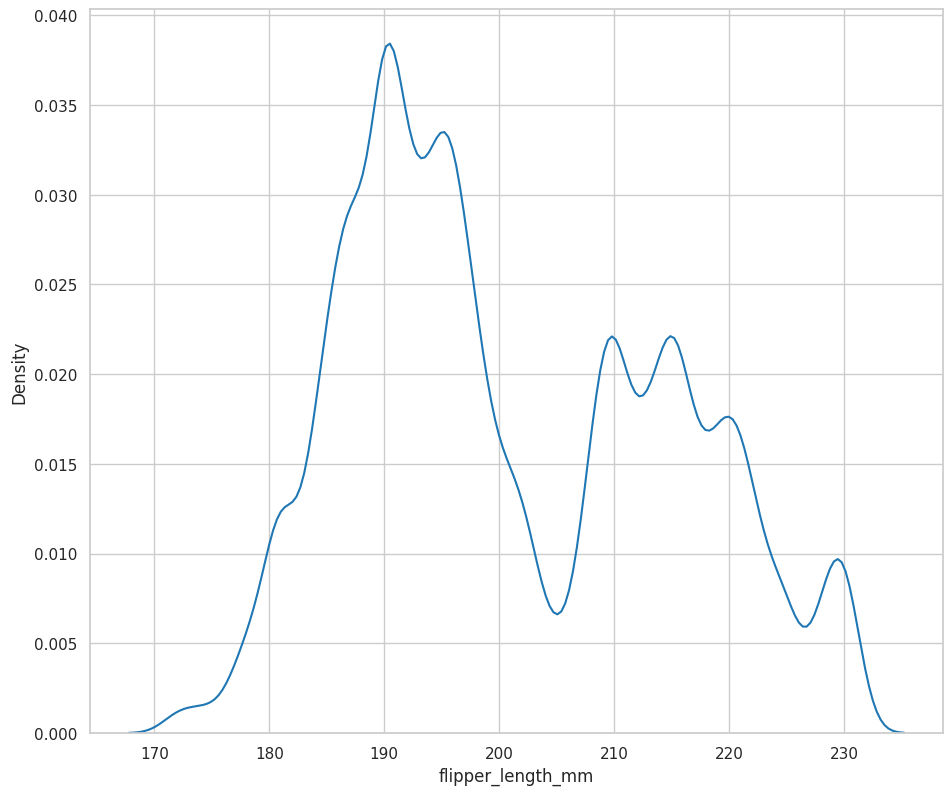

In [55]:
sns.kdeplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    bw_method=0.1
)

In [56]:
stats = processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<AxesSubplot: >

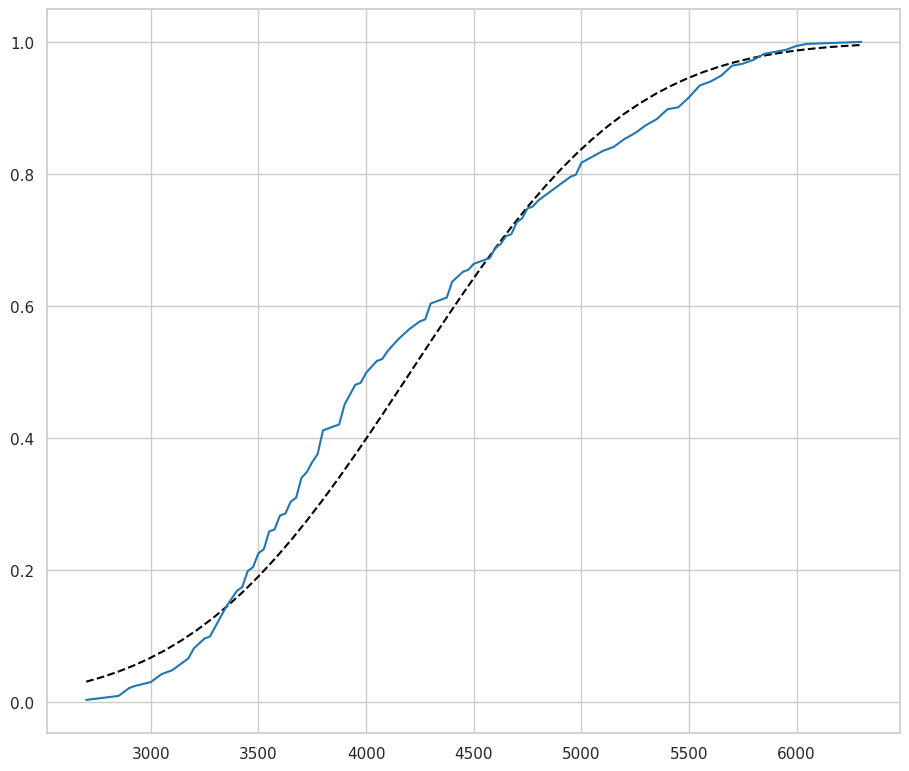

In [57]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot()

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

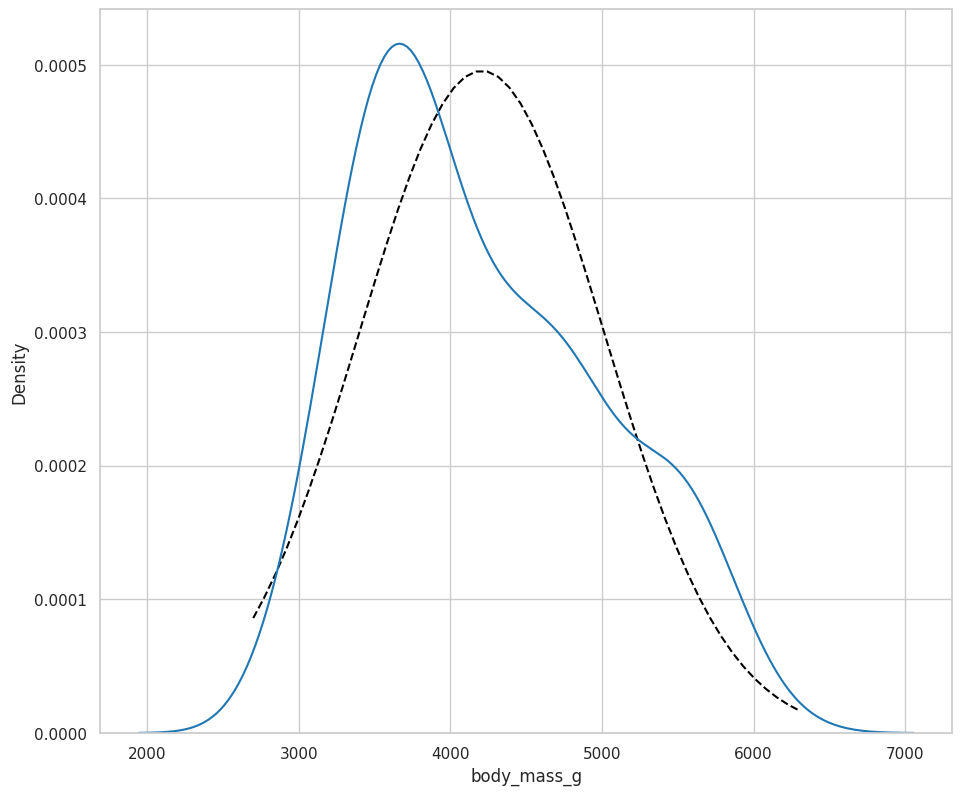

In [58]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data=processed_penguins_df,
    x='body_mass_g'
)

# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

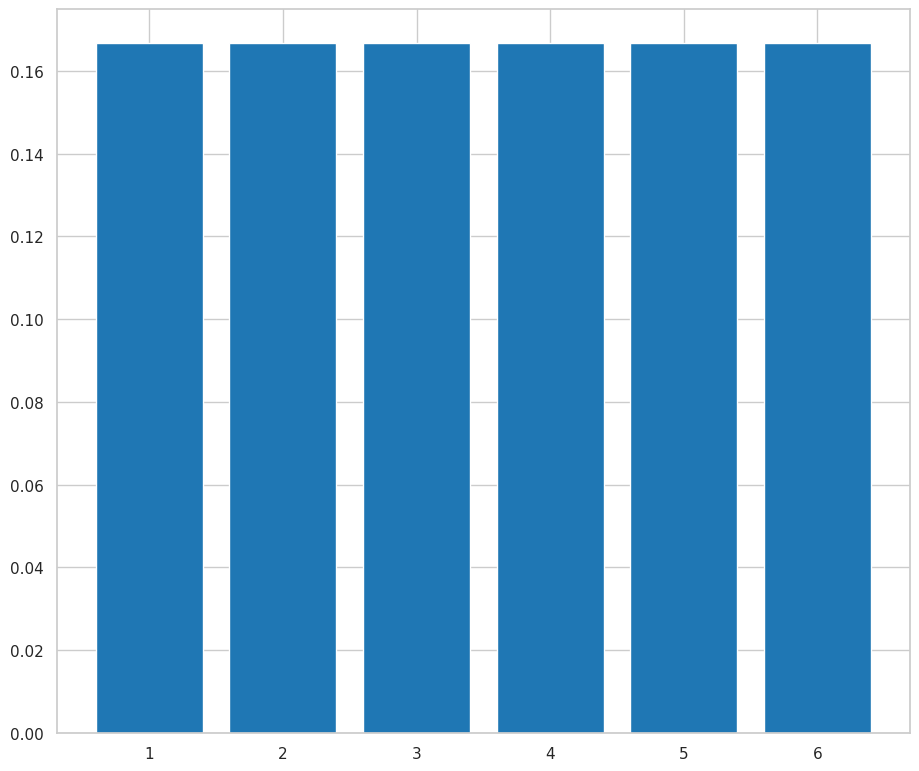

In [59]:
dice = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()

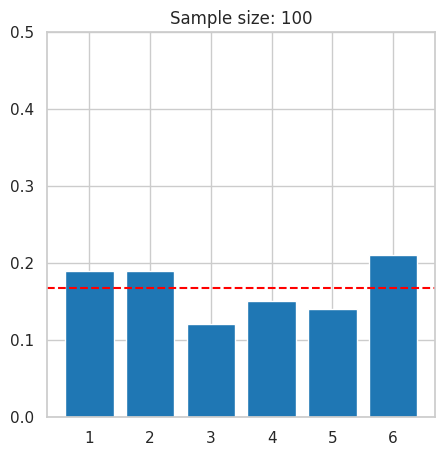

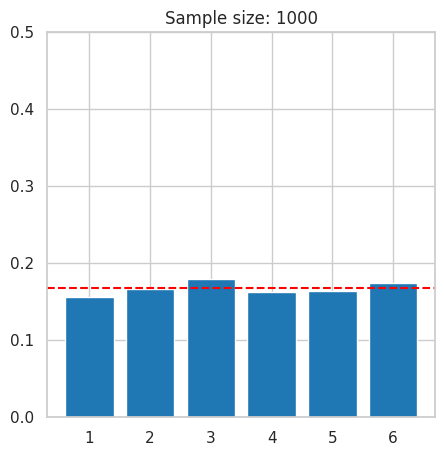

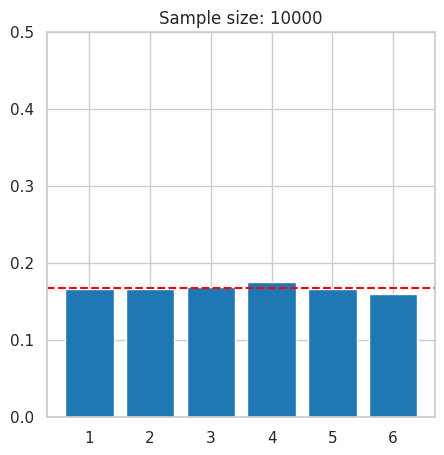

In [60]:
for sample_size in (1e2, 1e3,1e4):  #100 1000 10000
    sample_size = int(sample_size)
    values = dice.sample(sample_size) # obtener valores segun tamaño de la muestra
    sample_pmf = empiricaldist.Pmf.from_seq(values) #calculo de la probabilidad para cada valor
    #graficas para cada tamaño de muestra
    
    plt.figure(figsize=(5, 5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color='red', linestyle='dashed')
    plt.ylim([0,0.50])
    plt.title(f'Sample size: {sample_size}')


## Teorema del Límite Central

In [61]:
processed_penguins_df.sex.value_counts(normalize=True) #proporcion
#distribucion binomial, se deben usar numeros

male      0.504505
female    0.495495
Name: sex, dtype: float64

In [62]:
sex_numeric = processed_penguins_df.sex.replace(['male', 'female'], [1, 0])
sex_numeric
#aqui ya estan como numeros

0      1
1      0
2      0
4      0
5      1
      ..
339    1
340    0
341    1
342    1
343    0
Name: sex, Length: 333, dtype: int64

In [63]:
number_sample = 1000 #cantidad de muestras a tomar
sample_size = 35 #tamaño de la muestra

samples_df = pd.DataFrame() #dataframe donde se almacena las media de cada muestra

np.random.seed(42)

for i in range(1, number_sample + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f'sample {i}'
    samples_df[sample_name] = sex_numeric_sample

male_population_mean = samples_df.mean().mean()
print(f'El porcentaje de pinguinos machos en la poblacion es de: {male_population_mean*100:.4f}%')

/tmp/ipykernel_3038/909798719.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_3038/909798719.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_3038/909798719.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

El porcentaje de pinguinos machos en la poblacion es de: 50.1829%


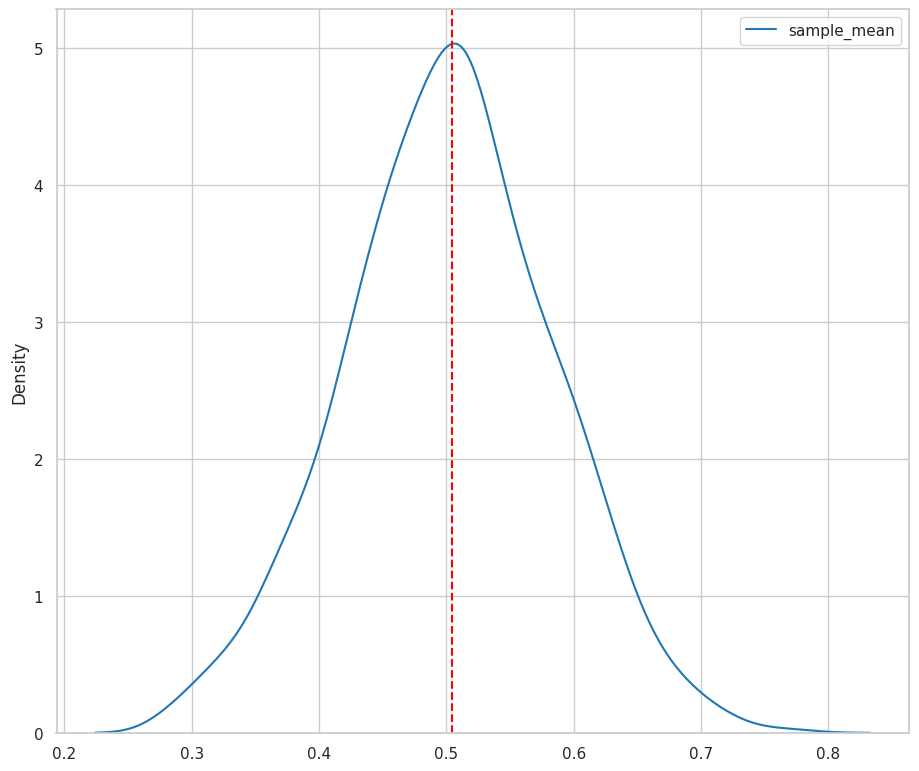

In [64]:
sample_means_binomial =pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

In [65]:
#sample_size_experiment = pd.DataFrame(
#    [[i,samples_df.iloc[:, 0:].mean().mean().mean()] for i in range(1, number_sample + 1)],
#    columns=['sample_size', 'estimated_mean']
#)

In [66]:
#sns.scatterplot(
#    data=sample_size_experiment,
#    x='sample_size',
#    y='estimated_mean'
#)

#plt.axhline(
#    y=sex_numeric.mean(),
#    color='red',
#    linestyle='dashed'
#)

#plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

# Estableciendo relaciones: Gráfica de puntos

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

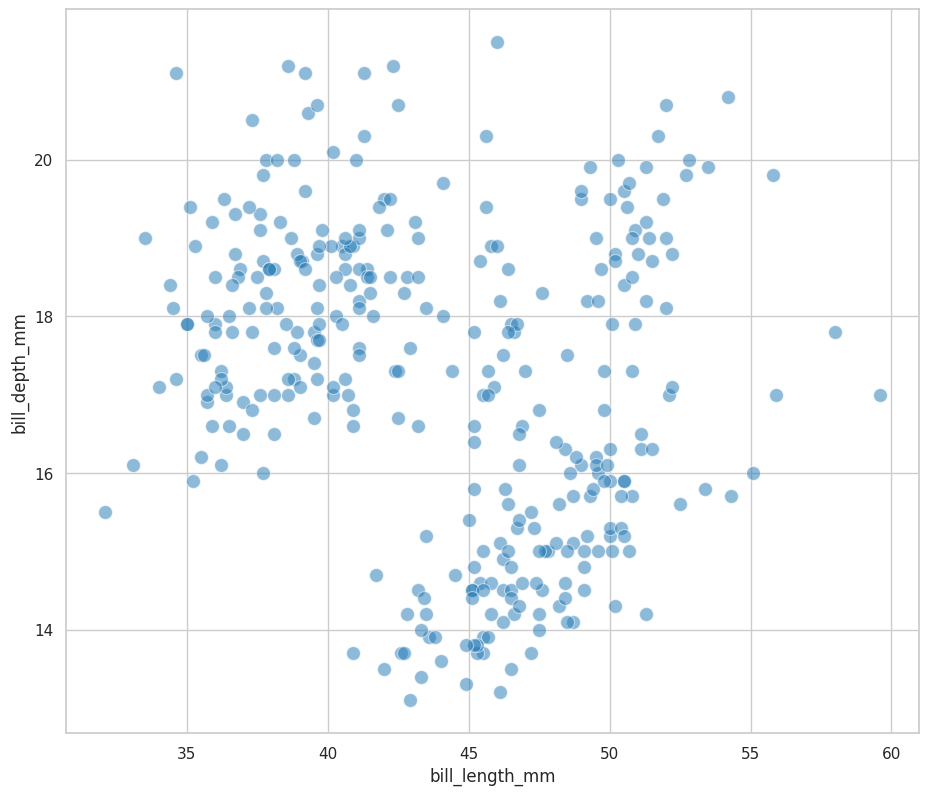

In [74]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2,
    s=100
)

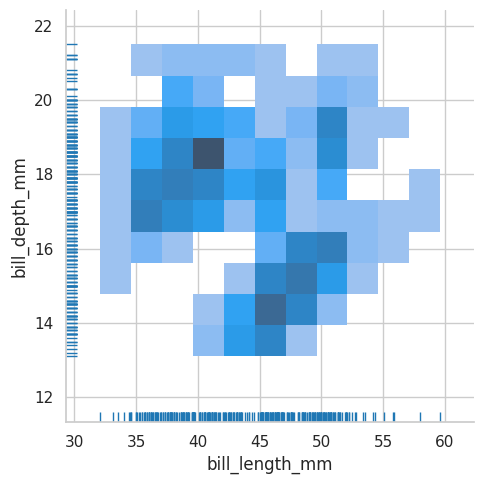

In [76]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True
)

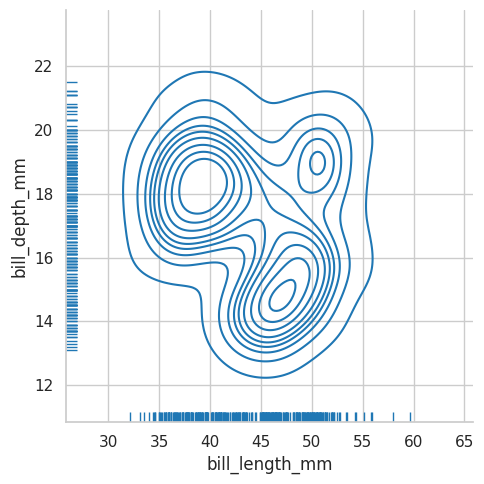

In [78]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    kind='kde'
)

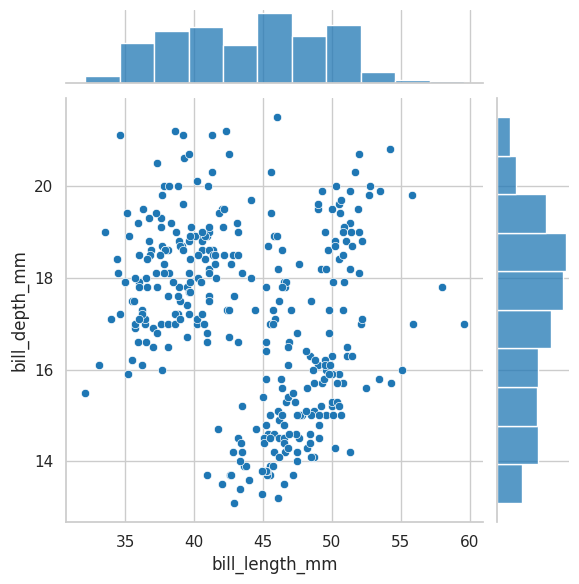

In [80]:

sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
)

# Estableciendo relaciones: Gráficos de violín y boxplots

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

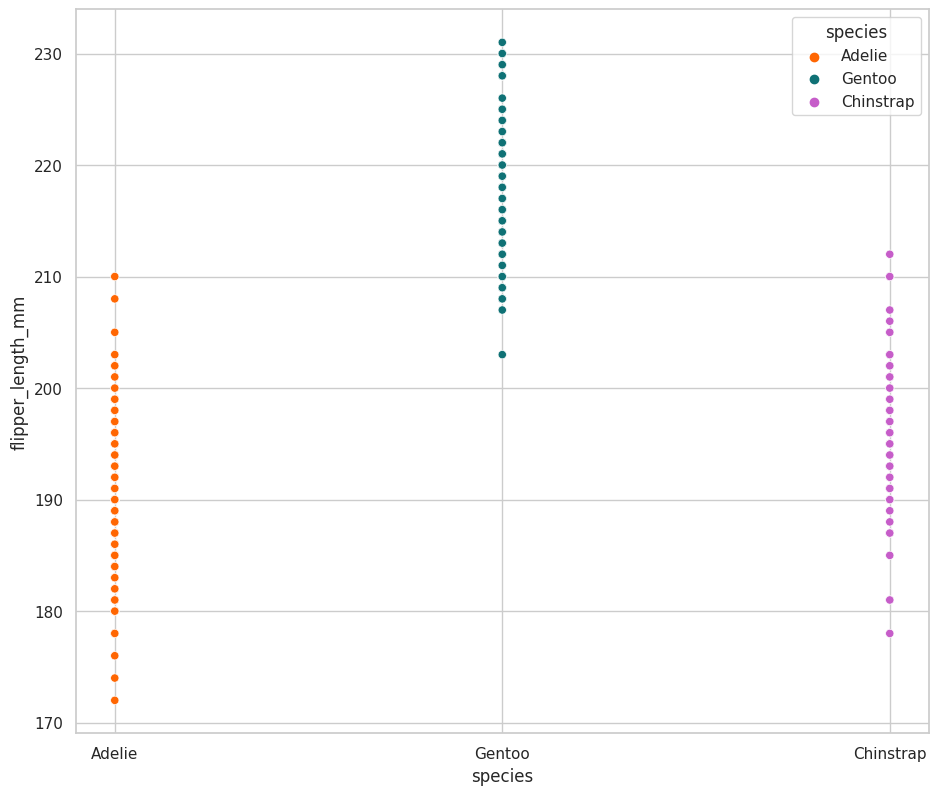

In [82]:
sns.scatterplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

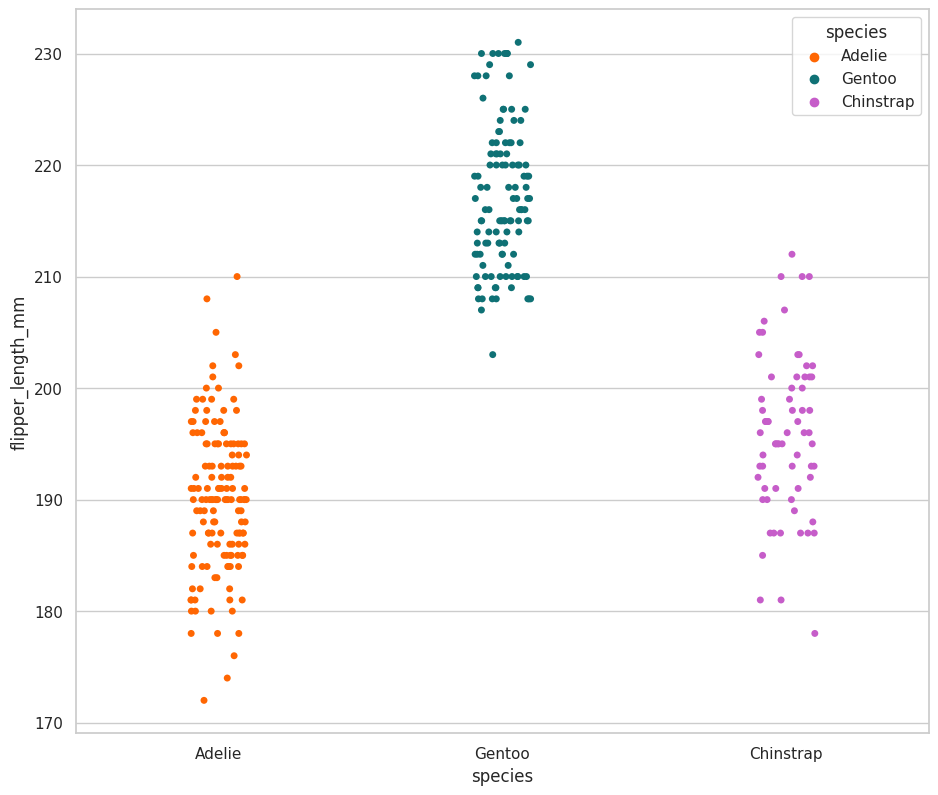

In [83]:
sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

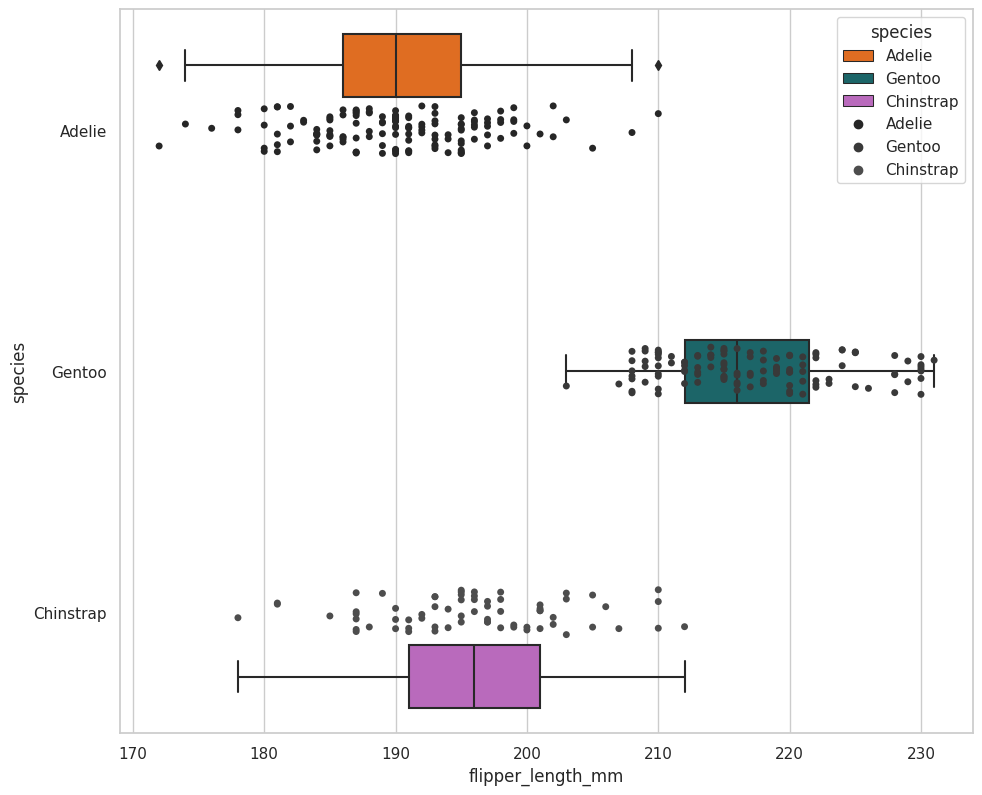

In [92]:
ax = sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    hue='species',
    palette=penguin_color
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    hue='species',
    palette='dark:.3'
)

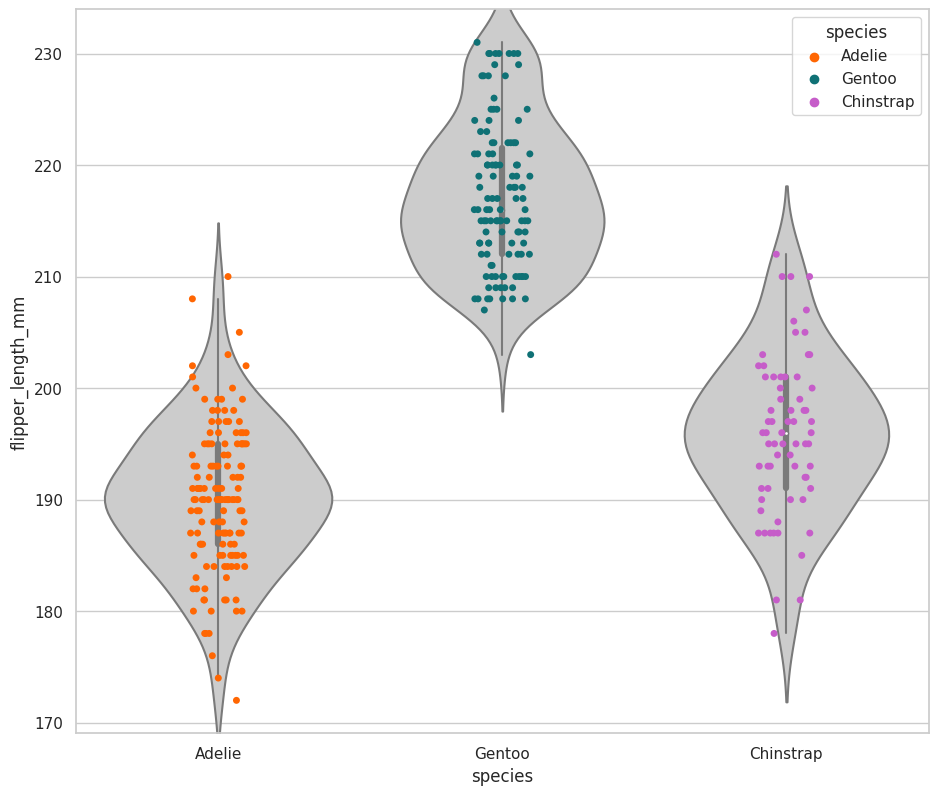

In [99]:
ax = sns.violinplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    color='.8'
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

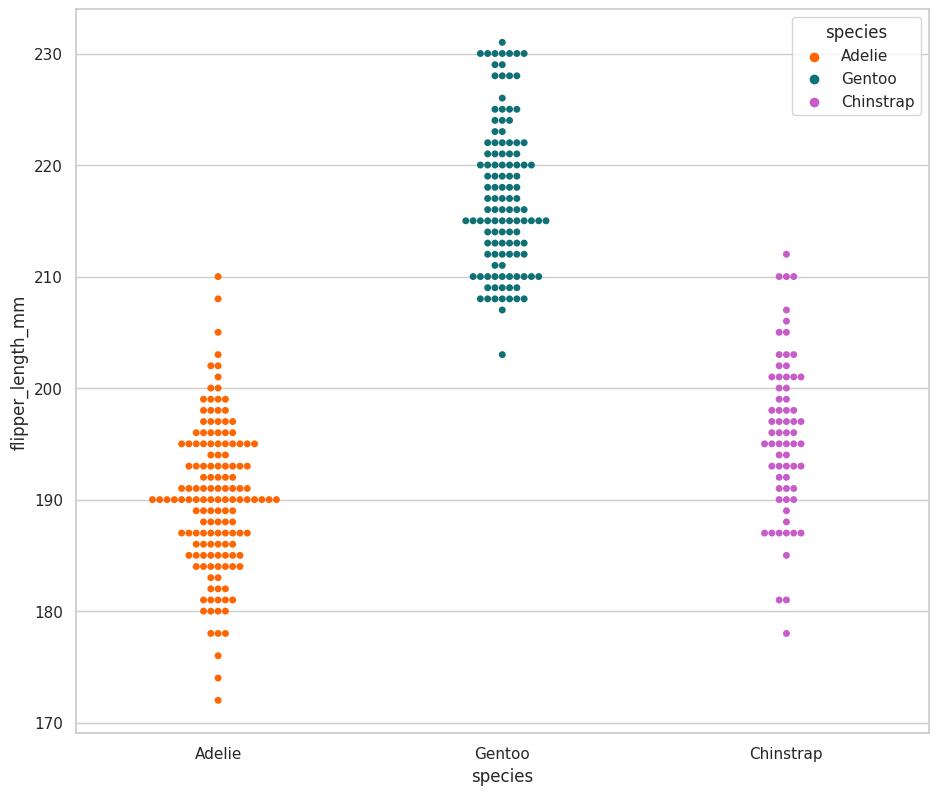

In [103]:
sns.swarmplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

## ¿Cómo puedo visualizar los coeficientes de correlación?

## ¿Cómo podría representar una variable categórica como númerica discreta?

## ¿Cuál es una limitante de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausenecia no significa que no exista otro tipo de correlación

### El coeficiente de correlación no nos habla del impacto de la relación

# Estableciendo relaciones: Análisis de regresión simple

# Limitaciones del análisis de regresión simple

## La regresión lineal simple no es simétrica

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿cuál sería la mejor forma de capturar ese dato?

### Creando modelos

#### Modelo 1

#### Modelo 2

#### Modelo 3

#### Modelo 4

#### Modelo 5

### Visualizando resultados

#### Creación de tabla de resultados

#### ECDFs

#### PDFs

#### ¿Qué pudimos haber encontrado antes de hacer los modelos?

# Análisis de regresión logística

## ¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

## Exploración de nuestras variables categóricas

## ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada clase?

# Paradoja de Simpson

## Información de sesión

In [67]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2d185315-3978-46ec-bc70-707a7a27274b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>